In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv("./NYC.csv")
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [4]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [5]:
df["passenger_count"].value_counts()

passenger_count
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: count, dtype: int64

In [6]:
df["store_and_fwd_flag"].value_counts()

store_and_fwd_flag
N    1450599
Y       8045
Name: count, dtype: int64

In [7]:
df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

In [8]:
df.duplicated().sum() #No duplicated values. 

0

In [9]:
df.isnull().sum() #No Null Values

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [10]:
df["vendor_id"].value_counts()

vendor_id
2    780302
1    678342
Name: count, dtype: int64

In [11]:
df.drop("id",axis=1,inplace=True) #Dropped the id column. 

In [12]:
#Pickup and Dropoff Date_time 
#Seperating pickup date and pickup time and dropoff date and dropoff time 
pickup_date = []
pickup_time = []
dropoff_date = []
dropoff_time = []

for i in range(0,df.shape[0]):
    a = df["pickup_datetime"][i].split(" ")
    b = df["dropoff_datetime"][i].split(" ")
    pickup_date.append(a[0])
    pickup_time.append(a[1])
    dropoff_date.append(b[0])
    dropoff_time.append(b[1])

pickup_date = pd.Series(pickup_date)
pickup_time = pd.Series(pickup_time)
dropoff_date = pd.Series(dropoff_date)
dropoff_time = pd.Series(dropoff_time)
    
modified_dataframe = pd.concat([df,pickup_date,pickup_time,dropoff_date,dropoff_time],axis=1)
modified_dataframe

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,0,1,2,3
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17:24:55,2016-03-14,17:32:30
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,00:43:35,2016-06-12,00:54:38
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11:35:24,2016-01-19,12:10:48
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19:32:31,2016-04-06,19:39:40
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13:30:55,2016-03-26,13:38:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,2016-04-08,13:31:04,2016-04-08,13:44:02
1458640,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,2016-01-10,07:35:15,2016-01-10,07:46:10
1458641,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,2016-04-22,06:57:41,2016-04-22,07:10:25
1458642,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,2016-01-05,15:56:26,2016-01-05,16:02:39


In [13]:
# Changing column names
new_column = {0:"pickup_date",1:"pickup_time",2:"dropoff_date",3:"dropoff_time"}
modified_dataframe.rename(columns=new_column,inplace=True)

# Dropping pickup_datetime and dropoff datetime columns
modified_dataframe.drop(["pickup_datetime","dropoff_datetime"],axis=1,inplace=True)
modified_dataframe.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_time,dropoff_date,dropoff_time
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17:24:55,2016-03-14,17:32:30
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,00:43:35,2016-06-12,00:54:38
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11:35:24,2016-01-19,12:10:48
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19:32:31,2016-04-06,19:39:40
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13:30:55,2016-03-26,13:38:10


In [14]:
modified_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458644 non-null  int64  
 1   passenger_count     1458644 non-null  int64  
 2   pickup_longitude    1458644 non-null  float64
 3   pickup_latitude     1458644 non-null  float64
 4   dropoff_longitude   1458644 non-null  float64
 5   dropoff_latitude    1458644 non-null  float64
 6   store_and_fwd_flag  1458644 non-null  object 
 7   trip_duration       1458644 non-null  int64  
 8   pickup_date         1458644 non-null  object 
 9   pickup_time         1458644 non-null  object 
 10  dropoff_date        1458644 non-null  object 
 11  dropoff_time        1458644 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 133.5+ MB


In [15]:
# Changing Datatype 
modified_dataframe["pickup_date"] = pd.to_datetime(modified_dataframe["pickup_date"])
modified_dataframe["pickup_time"] = pd.to_datetime(modified_dataframe["pickup_time"])
modified_dataframe["dropoff_date"] = pd.to_datetime(modified_dataframe["dropoff_date"])
modified_dataframe["dropoff_time"] = pd.to_datetime(modified_dataframe["dropoff_time"])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16408\1408959737.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  modified_dataframe["pickup_time"] = pd.to_datetime(modified_dataframe["pickup_time"])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16408\1408959737.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  modified_dataframe["dropoff_time"] = pd.to_datetime(modified_dataframe["dropoff_time"])


In [16]:
modified_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   vendor_id           1458644 non-null  int64         
 1   passenger_count     1458644 non-null  int64         
 2   pickup_longitude    1458644 non-null  float64       
 3   pickup_latitude     1458644 non-null  float64       
 4   dropoff_longitude   1458644 non-null  float64       
 5   dropoff_latitude    1458644 non-null  float64       
 6   store_and_fwd_flag  1458644 non-null  object        
 7   trip_duration       1458644 non-null  int64         
 8   pickup_date         1458644 non-null  datetime64[ns]
 9   pickup_time         1458644 non-null  datetime64[ns]
 10  dropoff_date        1458644 non-null  datetime64[ns]
 11  dropoff_time        1458644 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(4), int64(3), object(1)
memory usage: 13

In [17]:
modified_dataframe.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_time,dropoff_date,dropoff_time
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,2024-07-30 17:24:55,2016-03-14,2024-07-30 17:32:30
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,2024-07-30 00:43:35,2016-06-12,2024-07-30 00:54:38
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,2024-07-30 11:35:24,2016-01-19,2024-07-30 12:10:48
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,2024-07-30 19:32:31,2016-04-06,2024-07-30 19:39:40
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,2024-07-30 13:30:55,2016-03-26,2024-07-30 13:38:10


In [18]:
a = 0
for i in range(0,df.shape[0]):
    if(modified_dataframe["pickup_date"][i]==modified_dataframe["dropoff_date"][i]):
        a = 1
    elif(a == 0):
        x = modified_dataframe("pickup_date")[i]
        y = modified_dataframe("dropoff_date")[i]
        print(f"Date is different. Pickup Date = {x} and Dropoff Date is {y}")

In [19]:
# Checking if there are more than one taxi running on a single date|
df.shape[0] - modified_dataframe.duplicated(subset="pickup_date").sum() 

182

In [20]:
modified_dataframe.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_time,dropoff_date,dropoff_time
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,2024-07-30 17:24:55,2016-03-14,2024-07-30 17:32:30
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,2024-07-30 00:43:35,2016-06-12,2024-07-30 00:54:38
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,2024-07-30 11:35:24,2016-01-19,2024-07-30 12:10:48
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,2024-07-30 19:32:31,2016-04-06,2024-07-30 19:39:40
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,2024-07-30 13:30:55,2016-03-26,2024-07-30 13:38:10


In [21]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [22]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"] = pd.to_datetime(df["dropoff_datetime"])
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   vendor_id           1458644 non-null  int64         
 1   pickup_datetime     1458644 non-null  datetime64[ns]
 2   dropoff_datetime    1458644 non-null  datetime64[ns]
 3   passenger_count     1458644 non-null  int64         
 4   pickup_longitude    1458644 non-null  float64       
 5   pickup_latitude     1458644 non-null  float64       
 6   dropoff_longitude   1458644 non-null  float64       
 7   dropoff_latitude    1458644 non-null  float64       
 8   store_and_fwd_flag  1458644 non-null  object        
 9   trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(1)
memory usage: 111.3+ MB


<Axes: xlabel='passenger_count'>

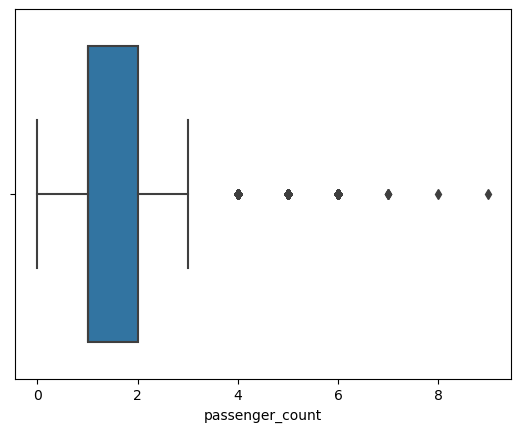

In [24]:
#Handling Outliers 
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df,x="passenger_count")

In [25]:
df["passenger_count"].value_counts()

passenger_count
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: count, dtype: int64

In [26]:
for i in range(0,df.shape[0]):
    if(df["passenger_count"][i] in [0,7,8,9]):
        df["passenger_count"].replace(df["passenger_count"][i],np.nan,inplace=True)

In [27]:
df["passenger_count"].replace(df["passenger_count"][i],np.nan,inplace=True)
df["passenger_count"] = df["passenger_count"].replace(df["passenger_count"][i], np.nan)

df.loc[i, "passenger_count"] = np.nan
df.isnull().sum()

vendor_id                   0
pickup_datetime             0
dropoff_datetime            0
passenger_count       1033605
pickup_longitude            0
pickup_latitude             0
dropoff_longitude           0
dropoff_latitude            0
store_and_fwd_flag          0
trip_duration               0
dtype: int64

In [28]:
df.dropna(inplace=True)

In [29]:
df.isnull().sum()

vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

<Axes: xlabel='passenger_count'>

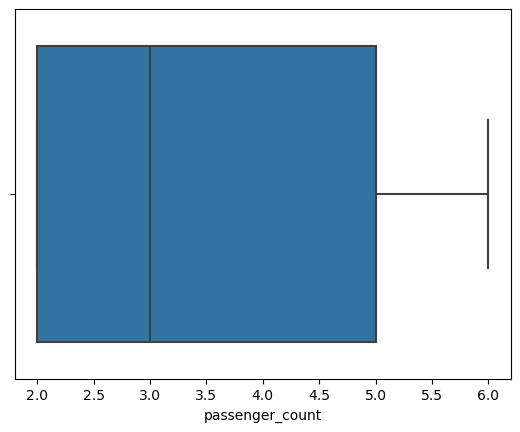

In [30]:
sns.boxplot(data=df,x="passenger_count")

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='passenger_count', ylabel='Count'>

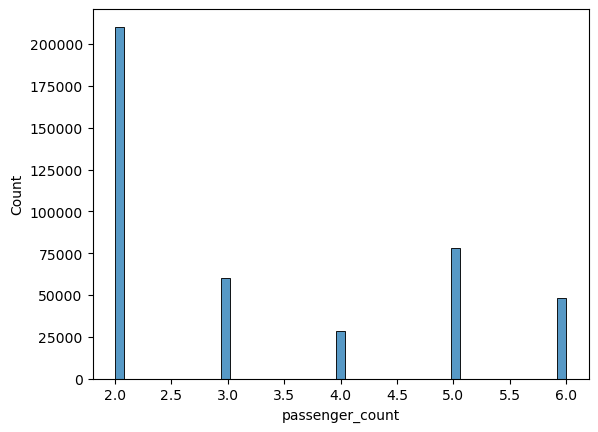

In [31]:
sns.histplot(data=df,x="passenger_count")

In [32]:
df.describe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,425039.000000,425039,425039,425039.000000,425039.000000,425039.000000,425039.000000,425039.000000,4.250390e+05
mean,1.699971,2016-04-01 15:17:14.185813504,2016-04-01 15:34:24.322946816,3.280588,-73.973332,40.750224,-73.973527,40.751370,1.030137e+03
min,1.000000,2016-01-01 00:00:17,2016-01-01 00:07:49,2.000000,-121.933342,34.359695,-121.933304,32.181141,1.000000e+00
25%,1.000000,2016-02-17 21:32:40.500000,2016-02-17 21:44:45.500000,2.000000,-73.992073,40.736538,-73.991409,40.735201,4.120000e+02
50%,2.000000,2016-04-02 01:08:45,2016-04-02 01:23:43,3.000000,-73.982040,40.753685,-73.980186,40.754391,6.830000e+02
75%,2.000000,2016-05-15 12:15:40.500000,2016-05-15 12:32:23,5.000000,-73.967781,40.768082,-73.963226,40.769676,1.109000e+03
max,2.000000,2016-06-30 23:59:37,2016-07-01 23:02:03,6.000000,-61.335529,41.319164,-61.335529,43.921028,2.049578e+06
std,0.458271,NaN,NaN,1.497074,0.114458,0.035922,0.114525,0.040351,4.853264e+03


In [33]:
df.passenger_count.value_counts()

passenger_count
2.0    210318
5.0     78088
3.0     59896
6.0     48333
4.0     28404
Name: count, dtype: int64

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='passenger_count', ylabel='Count'>

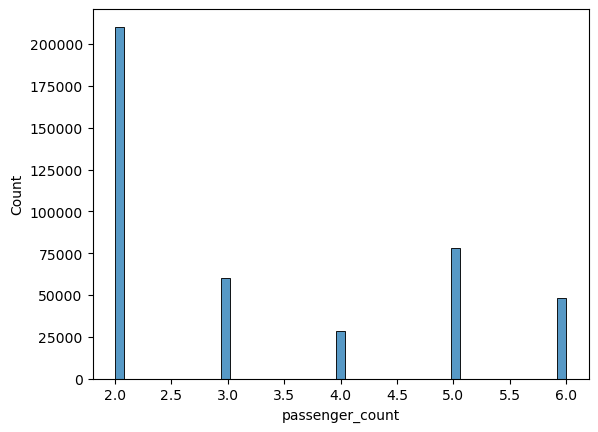

In [37]:
sns.histplot(data=df,x="passenger_count")

In [38]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
5,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6.0,-73.982857,40.742195,-73.992081,40.749184,N,443
6,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4.0,-73.969017,40.757839,-73.957405,40.765896,N,341
11,2,2016-05-15 11:16:11,2016-05-15 11:34:59,4.0,-73.991531,40.749439,-73.956543,40.770630,N,1128
12,2,2016-02-19 09:52:46,2016-02-19 10:11:20,2.0,-73.962982,40.756680,-73.984406,40.760719,N,1114
32,2,2016-05-10 19:27:38,2016-05-10 19:44:40,2.0,-74.005501,40.706589,-73.985817,40.744202,N,1022


<Axes: xlabel='pickup_longitude'>

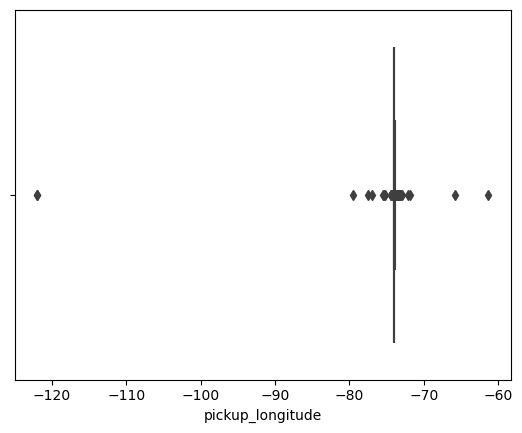

In [39]:
sns.boxplot(data=df,x="pickup_longitude")

In [40]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):   
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)
    
    radius = 6371.0
    
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    
    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = radius * c
    
    return distance

In [41]:
df.isnull().sum()

vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [42]:
df.shape[0]

425039

In [43]:
a = []

for i in range(df.shape[0]):
    lat1 = df["pickup_latitude"].iloc[i]
    lon1 = df["pickup_longitude"].iloc[i]
    lat2 = df["dropoff_latitude"].iloc[i]
    lon2 = df["dropoff_longitude"].iloc[i]    
    if pd.notnull(lat1) and pd.notnull(lon1) and pd.notnull(lat2) and pd.notnull(lon2):
        distance = calculate_distance(lat1, lon1, lat2, lon2)
        a.append(distance)
    else:
        a.append(np.nan)
distance = pd.Series(a)
distance.shape

(425039,)

In [44]:
df.shape

(425039, 10)

In [45]:
df_reset = df.reset_index(drop=True)
distance_reset = distance.reset_index(drop=True)

In [46]:
concatenated_df = pd.concat([df_reset, distance_reset], axis=1)
concatenated_df.shape

(425039, 11)

In [47]:
concatenated_df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,0
0,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6.0,-73.982857,40.742195,-73.992081,40.749184,N,443,1.098942
1,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4.0,-73.969017,40.757839,-73.957405,40.765896,N,341,1.326279
2,2,2016-05-15 11:16:11,2016-05-15 11:34:59,4.0,-73.991531,40.749439,-73.956543,40.770630,N,1128,3.773096
3,2,2016-02-19 09:52:46,2016-02-19 10:11:20,2.0,-73.962982,40.756680,-73.984406,40.760719,N,1114,1.859483
4,2,2016-05-10 19:27:38,2016-05-10 19:44:40,2.0,-74.005501,40.706589,-73.985817,40.744202,N,1022,4.499284


In [48]:
new_name = {0:"distance"}
concatenated_df.rename(columns=new_name,inplace=True)
df_new = concatenated_df
df_new.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6.0,-73.982857,40.742195,-73.992081,40.749184,N,443,1.098942
1,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4.0,-73.969017,40.757839,-73.957405,40.765896,N,341,1.326279
2,2,2016-05-15 11:16:11,2016-05-15 11:34:59,4.0,-73.991531,40.749439,-73.956543,40.770630,N,1128,3.773096
3,2,2016-02-19 09:52:46,2016-02-19 10:11:20,2.0,-73.962982,40.756680,-73.984406,40.760719,N,1114,1.859483
4,2,2016-05-10 19:27:38,2016-05-10 19:44:40,2.0,-74.005501,40.706589,-73.985817,40.744202,N,1022,4.499284


C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='vendor_id', ylabel='Count'>

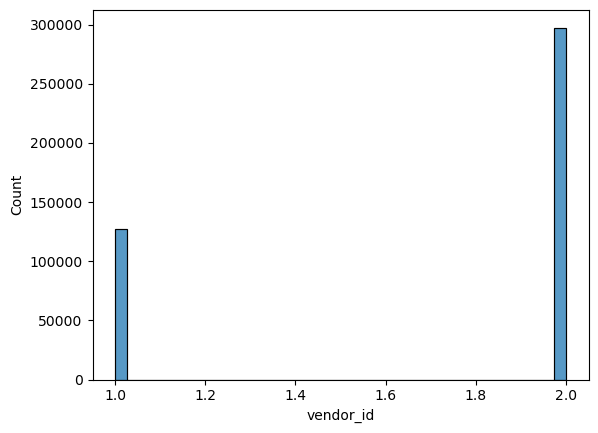

In [50]:
#Histogram
sns.histplot(df_new,x="vendor_id")

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='passenger_count', ylabel='Count'>

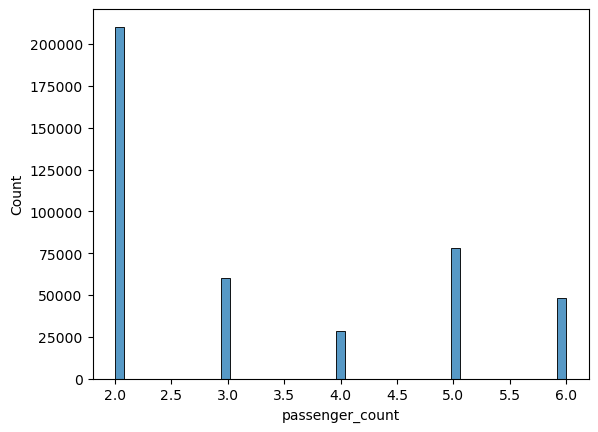

In [51]:
sns.histplot(df_new,x="passenger_count")

<Axes: xlabel='distance'>

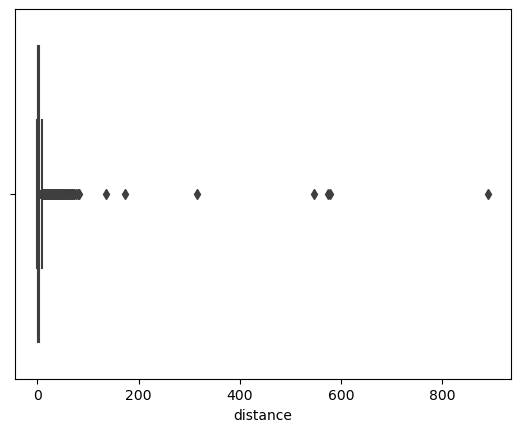

In [52]:
sns.boxplot(df_new,x="distance")

In [53]:
df_new["distance"].value_counts()

distance
0.000000     1690
0.000424       17
0.000424        9
0.000424        9
0.000848        9
             ... 
0.763136        1
1.511244        1
1.409324        1
12.004731       1
1.225080        1
Name: count, Length: 423277, dtype: int64

In [54]:
df_new.describe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance
count,425039.000000,425039,425039,425039.000000,425039.000000,425039.000000,425039.000000,425039.000000,4.250390e+05,425039.000000
mean,1.699971,2016-04-01 15:17:14.185813504,2016-04-01 15:34:24.322946816,3.280588,-73.973332,40.750224,-73.973527,40.751370,1.030137e+03,3.579833
min,1.000000,2016-01-01 00:00:17,2016-01-01 00:07:49,2.000000,-121.933342,34.359695,-121.933304,32.181141,1.000000e+00,0.000000
25%,1.000000,2016-02-17 21:32:40.500000,2016-02-17 21:44:45.500000,2.000000,-73.992073,40.736538,-73.991409,40.735201,4.120000e+02,1.259998
50%,2.000000,2016-04-02 01:08:45,2016-04-02 01:23:43,3.000000,-73.982040,40.753685,-73.980186,40.754391,6.830000e+02,2.143761
75%,2.000000,2016-05-15 12:15:40.500000,2016-05-15 12:32:23,5.000000,-73.967781,40.768082,-73.963226,40.769676,1.109000e+03,4.020425
max,2.000000,2016-06-30 23:59:37,2016-07-01 23:02:03,6.000000,-61.335529,41.319164,-61.335529,43.921028,2.049578e+06,891.214103
std,0.458271,NaN,NaN,1.497074,0.114458,0.035922,0.114525,0.040351,4.853264e+03,4.630449


In [55]:
#Handling Outliters for distance
iqr = df_new["distance"].quantile(0.75) - df_new["distance"].quantile(0.25)

upper_limit = df_new["distance"].quantile(0.75) + 1.5 * iqr
lower_limit = df_new["distance"].quantile(0.25) - 1.5 * iqr
upper_limit,lower_limit

(8.161065147538924, -2.8806428431325295)

In [56]:
lower_limit = 0 #Distance cannot be negative
df_new["distance"] = np.where(df_new["distance"] < upper_limit,df_new["distance"], upper_limit)
df_new.describe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance
count,425039.000000,425039,425039,425039.000000,425039.000000,425039.000000,425039.000000,425039.000000,4.250390e+05,425039.000000
mean,1.699971,2016-04-01 15:17:14.185813504,2016-04-01 15:34:24.322946816,3.280588,-73.973332,40.750224,-73.973527,40.751370,1.030137e+03,3.002227
min,1.000000,2016-01-01 00:00:17,2016-01-01 00:07:49,2.000000,-121.933342,34.359695,-121.933304,32.181141,1.000000e+00,0.000000
25%,1.000000,2016-02-17 21:32:40.500000,2016-02-17 21:44:45.500000,2.000000,-73.992073,40.736538,-73.991409,40.735201,4.120000e+02,1.259998
50%,2.000000,2016-04-02 01:08:45,2016-04-02 01:23:43,3.000000,-73.982040,40.753685,-73.980186,40.754391,6.830000e+02,2.143761
75%,2.000000,2016-05-15 12:15:40.500000,2016-05-15 12:32:23,5.000000,-73.967781,40.768082,-73.963226,40.769676,1.109000e+03,4.020425
max,2.000000,2016-06-30 23:59:37,2016-07-01 23:02:03,6.000000,-61.335529,41.319164,-61.335529,43.921028,2.049578e+06,8.161065
std,0.458271,NaN,NaN,1.497074,0.114458,0.035922,0.114525,0.040351,4.853264e+03,2.348940


<Axes: xlabel='distance'>

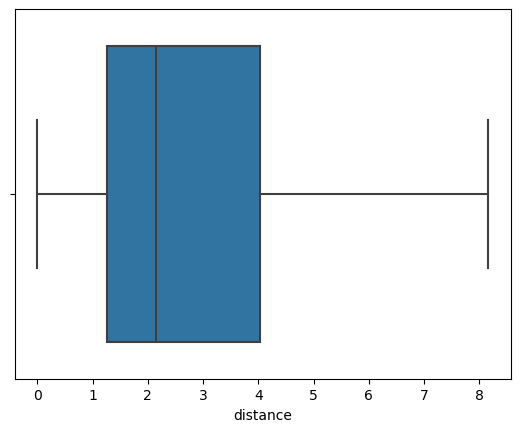

In [57]:
sns.boxplot(df_new,x="distance")

In [58]:
df_new.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6.0,-73.982857,40.742195,-73.992081,40.749184,N,443,1.098942
1,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4.0,-73.969017,40.757839,-73.957405,40.765896,N,341,1.326279
2,2,2016-05-15 11:16:11,2016-05-15 11:34:59,4.0,-73.991531,40.749439,-73.956543,40.770630,N,1128,3.773096
3,2,2016-02-19 09:52:46,2016-02-19 10:11:20,2.0,-73.962982,40.756680,-73.984406,40.760719,N,1114,1.859483
4,2,2016-05-10 19:27:38,2016-05-10 19:44:40,2.0,-74.005501,40.706589,-73.985817,40.744202,N,1022,4.499284


In [59]:
# df_new.drop("dropoff_datetime",axis=1,inplace=True)
df_new.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6.0,-73.982857,40.742195,-73.992081,40.749184,N,443,1.098942
1,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4.0,-73.969017,40.757839,-73.957405,40.765896,N,341,1.326279
2,2,2016-05-15 11:16:11,2016-05-15 11:34:59,4.0,-73.991531,40.749439,-73.956543,40.770630,N,1128,3.773096
3,2,2016-02-19 09:52:46,2016-02-19 10:11:20,2.0,-73.962982,40.756680,-73.984406,40.760719,N,1114,1.859483
4,2,2016-05-10 19:27:38,2016-05-10 19:44:40,2.0,-74.005501,40.706589,-73.985817,40.744202,N,1022,4.499284


In [60]:
year = df_new["pickup_datetime"].dt.year
month = df_new["pickup_datetime"].dt.month
days = df_new["pickup_datetime"].dt.day
hours = df_new["pickup_datetime"].dt.hour
minutes = df_new["pickup_datetime"].dt.minute
seconds = df_new["pickup_datetime"].dt.second

In [61]:
year.shape,month.shape,days.shape,hours.shape,minutes.shape,seconds.shape

((425039,), (425039,), (425039,), (425039,), (425039,), (425039,))

In [62]:
df_new = df_new.reset_index()
df_new["year"] = df_new["pickup_datetime"].dt.year
df_new.isnull().sum()

index                 0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
distance              0
year                  0
dtype: int64

In [63]:
df_new["month"] = df_new["pickup_datetime"].dt.month
df_new["days"] = df_new["pickup_datetime"].dt.day
df_new["hour"] = df_new["pickup_datetime"].dt.hour
df_new["minute"] = df_new["pickup_datetime"].dt.minute
df_new["second"] = df_new["pickup_datetime"].dt.second
df_new.isnull().sum()

index                 0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
distance              0
year                  0
month                 0
days                  0
hour                  0
minute                0
second                0
dtype: int64

In [64]:
df_new.head()

,index,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,year,month,days,hour,minute,second
0,0,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6.0,-73.982857,40.742195,-73.992081,40.749184,N,443,1.098942,2016,1,30,22,1,40
1,1,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4.0,-73.969017,40.757839,-73.957405,40.765896,N,341,1.326279,2016,6,17,22,34,59
2,2,2,2016-05-15 11:16:11,2016-05-15 11:34:59,4.0,-73.991531,40.749439,-73.956543,40.770630,N,1128,3.773096,2016,5,15,11,16,11
3,3,2,2016-02-19 09:52:46,2016-02-19 10:11:20,2.0,-73.962982,40.756680,-73.984406,40.760719,N,1114,1.859483,2016,2,19,9,52,46
4,4,2,2016-05-10 19:27:38,2016-05-10 19:44:40,2.0,-74.005501,40.706589,-73.985817,40.744202,N,1022,4.499284,2016,5,10,19,27,38


In [65]:
df_new.isnull().sum()

index                 0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
distance              0
year                  0
month                 0
days                  0
hour                  0
minute                0
second                0
dtype: int64

In [66]:
df_new.year.value_counts()

year
2016    425039
Name: count, dtype: int64

In [67]:
df_new.drop("year",axis=1,inplace=True)
df_new.head()

,index,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,month,days,hour,minute,second
0,0,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6.0,-73.982857,40.742195,-73.992081,40.749184,N,443,1.098942,1,30,22,1,40
1,1,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4.0,-73.969017,40.757839,-73.957405,40.765896,N,341,1.326279,6,17,22,34,59
2,2,2,2016-05-15 11:16:11,2016-05-15 11:34:59,4.0,-73.991531,40.749439,-73.956543,40.770630,N,1128,3.773096,5,15,11,16,11
3,3,2,2016-02-19 09:52:46,2016-02-19 10:11:20,2.0,-73.962982,40.756680,-73.984406,40.760719,N,1114,1.859483,2,19,9,52,46
4,4,2,2016-05-10 19:27:38,2016-05-10 19:44:40,2.0,-74.005501,40.706589,-73.985817,40.744202,N,1022,4.499284,5,10,19,27,38


In [68]:
df_new.drop("index",axis=1,inplace=True)
df_new.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,month,days,hour,minute,second
0,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6.0,-73.982857,40.742195,-73.992081,40.749184,N,443,1.098942,1,30,22,1,40
1,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4.0,-73.969017,40.757839,-73.957405,40.765896,N,341,1.326279,6,17,22,34,59
2,2,2016-05-15 11:16:11,2016-05-15 11:34:59,4.0,-73.991531,40.749439,-73.956543,40.770630,N,1128,3.773096,5,15,11,16,11
3,2,2016-02-19 09:52:46,2016-02-19 10:11:20,2.0,-73.962982,40.756680,-73.984406,40.760719,N,1114,1.859483,2,19,9,52,46
4,2,2016-05-10 19:27:38,2016-05-10 19:44:40,2.0,-74.005501,40.706589,-73.985817,40.744202,N,1022,4.499284,5,10,19,27,38


In [69]:
df_new.month.value_counts()

month
3    74116
4    73789
5    73021
2    68658
6    68359
1    67096
Name: count, dtype: int64

In [70]:
df_new.describe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,month,days,hour,minute,second
count,425039.000000,425039,425039,425039.000000,425039.000000,425039.000000,425039.000000,425039.000000,4.250390e+05,425039.000000,425039.000000,425039.000000,425039.000000,425039.000000,425039.000000
mean,1.699971,2016-04-01 15:17:14.185813504,2016-04-01 15:34:24.322946816,3.280588,-73.973332,40.750224,-73.973527,40.751370,1.030137e+03,3.002227,3.522441,15.537073,13.851790,29.601488,29.476081
min,1.000000,2016-01-01 00:00:17,2016-01-01 00:07:49,2.000000,-121.933342,34.359695,-121.933304,32.181141,1.000000e+00,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,2016-02-17 21:32:40.500000,2016-02-17 21:44:45.500000,2.000000,-73.992073,40.736538,-73.991409,40.735201,4.120000e+02,1.259998,2.000000,8.000000,9.000000,15.000000,14.000000
50%,2.000000,2016-04-02 01:08:45,2016-04-02 01:23:43,3.000000,-73.982040,40.753685,-73.980186,40.754391,6.830000e+02,2.143761,4.000000,15.000000,15.000000,30.000000,29.000000
75%,2.000000,2016-05-15 12:15:40.500000,2016-05-15 12:32:23,5.000000,-73.967781,40.768082,-73.963226,40.769676,1.109000e+03,4.020425,5.000000,23.000000,19.000000,45.000000,45.000000
max,2.000000,2016-06-30 23:59:37,2016-07-01 23:02:03,6.000000,-61.335529,41.319164,-61.335529,43.921028,2.049578e+06,8.161065,6.000000,31.000000,23.000000,59.000000,59.000000
std,0.458271,NaN,NaN,1.497074,0.114458,0.035922,0.114525,0.040351,4.853264e+03,2.348940,1.681754,8.720756,6.502928,17.339822,17.326803


<Axes: >

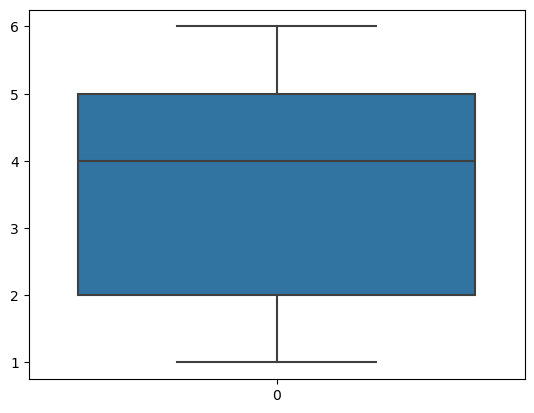

In [71]:
sns.boxplot(df_new["month"])

<Axes: >

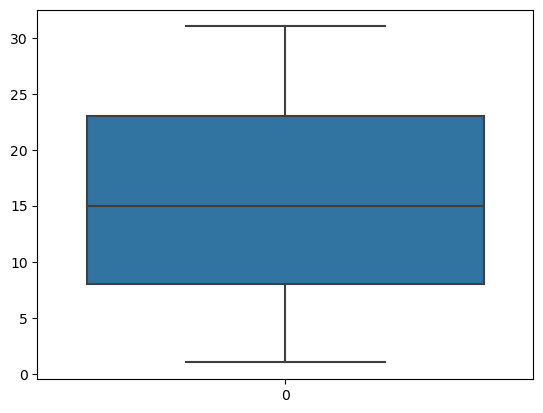

In [72]:
sns.boxplot(df_new["days"])

<Axes: >

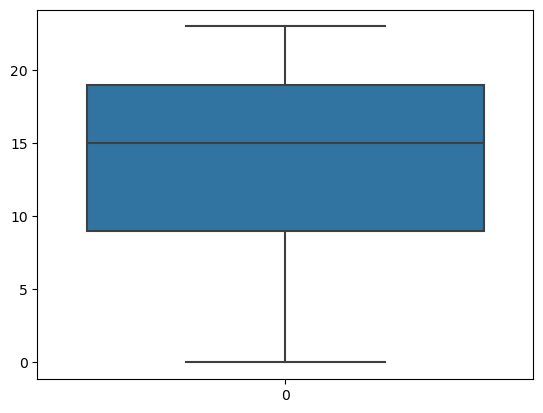

In [73]:
sns.boxplot(df_new["hour"])

<Axes: >

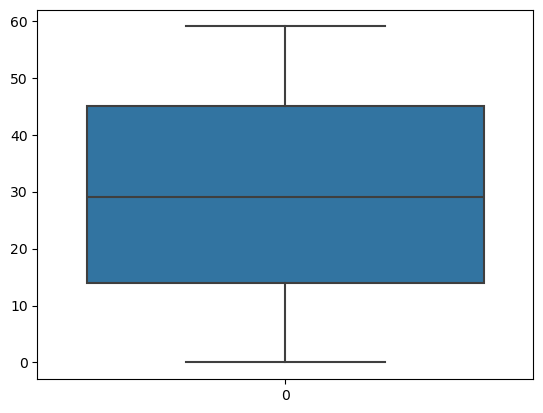

In [74]:
sns.boxplot(df_new["second"])

<Axes: >

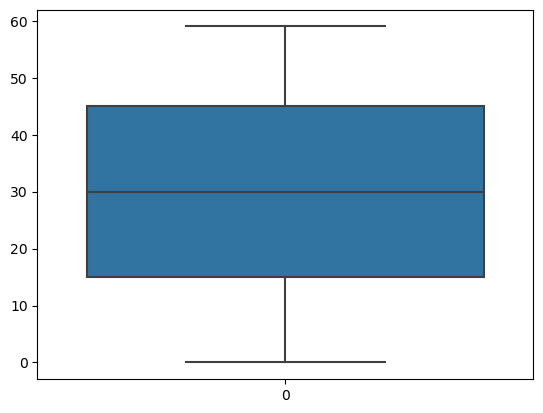

In [75]:
sns.boxplot(df_new["minute"])

In [76]:
df_new.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,month,days,hour,minute,second
0,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6.0,-73.982857,40.742195,-73.992081,40.749184,N,443,1.098942,1,30,22,1,40
1,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4.0,-73.969017,40.757839,-73.957405,40.765896,N,341,1.326279,6,17,22,34,59
2,2,2016-05-15 11:16:11,2016-05-15 11:34:59,4.0,-73.991531,40.749439,-73.956543,40.770630,N,1128,3.773096,5,15,11,16,11
3,2,2016-02-19 09:52:46,2016-02-19 10:11:20,2.0,-73.962982,40.756680,-73.984406,40.760719,N,1114,1.859483,2,19,9,52,46
4,2,2016-05-10 19:27:38,2016-05-10 19:44:40,2.0,-74.005501,40.706589,-73.985817,40.744202,N,1022,4.499284,5,10,19,27,38


In [77]:
df_new.drop("pickup_datetime",axis=1,inplace=True)
df_new.head()

,vendor_id,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,month,days,hour,minute,second
0,2,2016-01-30 22:09:03,6.0,-73.982857,40.742195,-73.992081,40.749184,N,443,1.098942,1,30,22,1,40
1,1,2016-06-17 22:40:40,4.0,-73.969017,40.757839,-73.957405,40.765896,N,341,1.326279,6,17,22,34,59
2,2,2016-05-15 11:34:59,4.0,-73.991531,40.749439,-73.956543,40.770630,N,1128,3.773096,5,15,11,16,11
3,2,2016-02-19 10:11:20,2.0,-73.962982,40.756680,-73.984406,40.760719,N,1114,1.859483,2,19,9,52,46
4,2,2016-05-10 19:44:40,2.0,-74.005501,40.706589,-73.985817,40.744202,N,1022,4.499284,5,10,19,27,38


In [78]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False,drop="first")
store_and_fwd_flag_encoded = ohe.fit_transform(df_new[["store_and_fwd_flag"]])

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [79]:
ohe.categories_

[array(['N', 'Y'], dtype=object)]

In [80]:
df_new["Y"] = store_and_fwd_flag_encoded
df_new.head()

,vendor_id,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,month,days,hour,minute,second,Y
0,2,2016-01-30 22:09:03,6.0,-73.982857,40.742195,-73.992081,40.749184,N,443,1.098942,1,30,22,1,40,0.0
1,1,2016-06-17 22:40:40,4.0,-73.969017,40.757839,-73.957405,40.765896,N,341,1.326279,6,17,22,34,59,0.0
2,2,2016-05-15 11:34:59,4.0,-73.991531,40.749439,-73.956543,40.770630,N,1128,3.773096,5,15,11,16,11,0.0
3,2,2016-02-19 10:11:20,2.0,-73.962982,40.756680,-73.984406,40.760719,N,1114,1.859483,2,19,9,52,46,0.0
4,2,2016-05-10 19:44:40,2.0,-74.005501,40.706589,-73.985817,40.744202,N,1022,4.499284,5,10,19,27,38,0.0


In [81]:
df_new.rename({"Y":"Yes_store_and_fwd_flag"},axis=1,inplace=True)
df_new.head()

,vendor_id,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,month,days,hour,minute,second,Yes_store_and_fwd_flag
0,2,2016-01-30 22:09:03,6.0,-73.982857,40.742195,-73.992081,40.749184,N,443,1.098942,1,30,22,1,40,0.0
1,1,2016-06-17 22:40:40,4.0,-73.969017,40.757839,-73.957405,40.765896,N,341,1.326279,6,17,22,34,59,0.0
2,2,2016-05-15 11:34:59,4.0,-73.991531,40.749439,-73.956543,40.770630,N,1128,3.773096,5,15,11,16,11,0.0
3,2,2016-02-19 10:11:20,2.0,-73.962982,40.756680,-73.984406,40.760719,N,1114,1.859483,2,19,9,52,46,0.0
4,2,2016-05-10 19:44:40,2.0,-74.005501,40.706589,-73.985817,40.744202,N,1022,4.499284,5,10,19,27,38,0.0


In [82]:
df_new.drop("store_and_fwd_flag",axis=1,inplace=True)
df_new.head()

,vendor_id,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,month,days,hour,minute,second,Yes_store_and_fwd_flag
0,2,2016-01-30 22:09:03,6.0,-73.982857,40.742195,-73.992081,40.749184,443,1.098942,1,30,22,1,40,0.0
1,1,2016-06-17 22:40:40,4.0,-73.969017,40.757839,-73.957405,40.765896,341,1.326279,6,17,22,34,59,0.0
2,2,2016-05-15 11:34:59,4.0,-73.991531,40.749439,-73.956543,40.770630,1128,3.773096,5,15,11,16,11,0.0
3,2,2016-02-19 10:11:20,2.0,-73.962982,40.756680,-73.984406,40.760719,1114,1.859483,2,19,9,52,46,0.0
4,2,2016-05-10 19:44:40,2.0,-74.005501,40.706589,-73.985817,40.744202,1022,4.499284,5,10,19,27,38,0.0


In [83]:
df_new.corr()

,vendor_id,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,month,days,hour,minute,second,Yes_store_and_fwd_flag
vendor_id,1.000000,-0.017116,0.393808,-0.001569,0.031683,-0.001763,0.019487,0.011095,-0.041926,-0.016647,-0.002971,-0.036457,0.002827,0.000538,-0.094214
dropoff_datetime,-0.017116,1.000000,-0.011563,0.004764,-0.003221,0.004096,-0.000342,0.011990,0.022419,0.985610,0.156824,0.002501,0.000257,-0.001025,0.003163
passenger_count,0.393808,-0.011563,1.000000,0.001973,0.015428,0.000825,0.008825,0.005389,-0.017170,-0.011600,0.000267,-0.030493,0.001919,0.002653,-0.036369
pickup_longitude,-0.001569,0.004764,0.001973,1.000000,0.087488,0.902483,0.143203,0.019031,0.134068,0.005112,-0.001965,0.007182,-0.001586,0.000151,0.007691
pickup_latitude,0.031683,-0.003221,0.015428,0.087488,1.000000,0.169795,0.560675,-0.029176,-0.171996,-0.002083,-0.007143,0.014509,0.001239,-0.000845,-0.011660
dropoff_longitude,-0.001763,0.004096,0.000825,0.902483,0.169795,1.000000,0.140278,0.010622,0.107014,0.004687,-0.002662,-0.015550,-0.001308,0.000318,0.004286
dropoff_latitude,0.019487,-0.000342,0.008825,0.143203,0.560675,0.140278,1.000000,-0.020397,-0.102585,0.000562,-0.005591,0.016483,0.001981,-0.002172,-0.009221
trip_duration,0.011095,0.011990,0.005389,0.019031,-0.029176,0.010622,-0.020397,1.000000,0.109903,0.010865,0.000911,0.002470,-0.002698,-0.001935,0.003228
distance,-0.041926,0.022419,-0.017170,0.134068,-0.171996,0.107014,-0.102585,0.109903,1.000000,0.021658,0.007044,-0.037191,-0.008475,0.001208,0.028269
month,-0.016647,0.985610,-0.011600,0.005112,-0.002083,0.004687,0.000562,0.010865,0.021658,1.000000,-0.012081,-0.003356,0.000510,-0.001288,0.003104


In [84]:
df_new['final_seconds'] = df_new['hour'] * 3600 + df_new['minute'] * 60 + df_new['second']
df_new.head()

,vendor_id,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,month,days,hour,minute,second,Yes_store_and_fwd_flag,final_seconds
0,2,2016-01-30 22:09:03,6.0,-73.982857,40.742195,-73.992081,40.749184,443,1.098942,1,30,22,1,40,0.0,79300
1,1,2016-06-17 22:40:40,4.0,-73.969017,40.757839,-73.957405,40.765896,341,1.326279,6,17,22,34,59,0.0,81299
2,2,2016-05-15 11:34:59,4.0,-73.991531,40.749439,-73.956543,40.770630,1128,3.773096,5,15,11,16,11,0.0,40571
3,2,2016-02-19 10:11:20,2.0,-73.962982,40.756680,-73.984406,40.760719,1114,1.859483,2,19,9,52,46,0.0,35566
4,2,2016-05-10 19:44:40,2.0,-74.005501,40.706589,-73.985817,40.744202,1022,4.499284,5,10,19,27,38,0.0,70058


In [85]:
df_new.corr()

,vendor_id,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,month,days,hour,minute,second,Yes_store_and_fwd_flag,final_seconds
vendor_id,1.000000,-0.017116,0.393808,-0.001569,0.031683,-0.001763,0.019487,0.011095,-0.041926,-0.016647,-0.002971,-0.036457,0.002827,0.000538,-0.094214,-0.036294
dropoff_datetime,-0.017116,1.000000,-0.011563,0.004764,-0.003221,0.004096,-0.000342,0.011990,0.022419,0.985610,0.156824,0.002501,0.000257,-0.001025,0.003163,0.002509
passenger_count,0.393808,-0.011563,1.000000,0.001973,0.015428,0.000825,0.008825,0.005389,-0.017170,-0.011600,0.000267,-0.030493,0.001919,0.002653,-0.036369,-0.030375
pickup_longitude,-0.001569,0.004764,0.001973,1.000000,0.087488,0.902483,0.143203,0.019031,0.134068,0.005112,-0.001965,0.007182,-0.001586,0.000151,0.007691,0.007105
pickup_latitude,0.031683,-0.003221,0.015428,0.087488,1.000000,0.169795,0.560675,-0.029176,-0.171996,-0.002083,-0.007143,0.014509,0.001239,-0.000845,-0.011660,0.014549
dropoff_longitude,-0.001763,0.004096,0.000825,0.902483,0.169795,1.000000,0.140278,0.010622,0.107014,0.004687,-0.002662,-0.015550,-0.001308,0.000318,0.004286,-0.015592
dropoff_latitude,0.019487,-0.000342,0.008825,0.143203,0.560675,0.140278,1.000000,-0.020397,-0.102585,0.000562,-0.005591,0.016483,0.001981,-0.002172,-0.009221,0.016553
trip_duration,0.011095,0.011990,0.005389,0.019031,-0.029176,0.010622,-0.020397,1.000000,0.109903,0.010865,0.000911,0.002470,-0.002698,-0.001935,0.003228,0.002346
distance,-0.041926,0.022419,-0.017170,0.134068,-0.171996,0.107014,-0.102585,0.109903,1.000000,0.021658,0.007044,-0.037191,-0.008475,0.001208,0.028269,-0.037528
month,-0.016647,0.985610,-0.011600,0.005112,-0.002083,0.004687,0.000562,0.010865,0.021658,1.000000,-0.012081,-0.003356,0.000510,-0.001288,0.003104,-0.003331


In [86]:
df_new.drop(["hour","second","minute"],axis=1,inplace=True)
df_new.head()

,vendor_id,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,month,days,Yes_store_and_fwd_flag,final_seconds
0,2,2016-01-30 22:09:03,6.0,-73.982857,40.742195,-73.992081,40.749184,443,1.098942,1,30,0.0,79300
1,1,2016-06-17 22:40:40,4.0,-73.969017,40.757839,-73.957405,40.765896,341,1.326279,6,17,0.0,81299
2,2,2016-05-15 11:34:59,4.0,-73.991531,40.749439,-73.956543,40.770630,1128,3.773096,5,15,0.0,40571
3,2,2016-02-19 10:11:20,2.0,-73.962982,40.756680,-73.984406,40.760719,1114,1.859483,2,19,0.0,35566
4,2,2016-05-10 19:44:40,2.0,-74.005501,40.706589,-73.985817,40.744202,1022,4.499284,5,10,0.0,70058


Text(0.5, 1.0, 'Correlation Matrix')

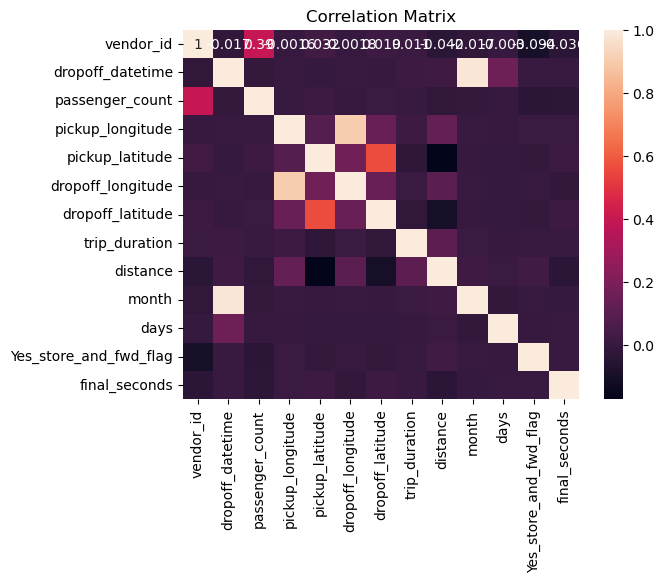

In [87]:
import seaborn as sns

sns.heatmap(df_new.corr(), annot=True)
plt.title('Correlation Matrix')

In [88]:
# Calculating speed
speed = []
for i in range(df.shape[0]):
    if df_new['final_seconds'][i] != 0:
        speed_value = df_new["distance"][i] / df_new['final_seconds'][i]
    else:
        speed_value = np.nan  # Assign NaN when denominator is zero
    
    speed.append(speed_value)
df_new["speed"] = speed 

In [89]:
df_new.head()

,vendor_id,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,month,days,Yes_store_and_fwd_flag,final_seconds,speed
0,2,2016-01-30 22:09:03,6.0,-73.982857,40.742195,-73.992081,40.749184,443,1.098942,1,30,0.0,79300,0.000014
1,1,2016-06-17 22:40:40,4.0,-73.969017,40.757839,-73.957405,40.765896,341,1.326279,6,17,0.0,81299,0.000016
2,2,2016-05-15 11:34:59,4.0,-73.991531,40.749439,-73.956543,40.770630,1128,3.773096,5,15,0.0,40571,0.000093
3,2,2016-02-19 10:11:20,2.0,-73.962982,40.756680,-73.984406,40.760719,1114,1.859483,2,19,0.0,35566,0.000052
4,2,2016-05-10 19:44:40,2.0,-74.005501,40.706589,-73.985817,40.744202,1022,4.499284,5,10,0.0,70058,0.000064


In [90]:
df_new.isnull().sum()

vendor_id                 0
dropoff_datetime          0
passenger_count           0
pickup_longitude          0
pickup_latitude           0
dropoff_longitude         0
dropoff_latitude          0
trip_duration             0
distance                  0
month                     0
days                      0
Yes_store_and_fwd_flag    0
final_seconds             0
speed                     4
dtype: int64

In [91]:
X = df_new.drop(['trip_duration','speed',"dropoff_datetime"], axis=1)
y = df_new['trip_duration']

In [92]:
X

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,month,days,Yes_store_and_fwd_flag,final_seconds
0,2,6.0,-73.982857,40.742195,-73.992081,40.749184,1.098942,1,30,0.0,79300
1,1,4.0,-73.969017,40.757839,-73.957405,40.765896,1.326279,6,17,0.0,81299
2,2,4.0,-73.991531,40.749439,-73.956543,40.770630,3.773096,5,15,0.0,40571
3,2,2.0,-73.962982,40.756680,-73.984406,40.760719,1.859483,2,19,0.0,35566
4,2,2.0,-74.005501,40.706589,-73.985817,40.744202,4.499284,5,10,0.0,70058
...,...,...,...,...,...,...,...,...,...,...,...
425034,2,2.0,-74.015572,40.710892,-73.996620,40.743633,3.975543,3,6,0.0,39888
425035,1,3.0,-73.979652,40.735279,-73.995522,40.759754,3.032111,3,17,0.0,69016
425036,1,2.0,-73.989075,40.730465,-73.963882,40.773739,5.258989,4,3,0.0,49885
425037,2,5.0,-73.988823,40.736553,-73.989166,40.757393,2.317448,2,2,0.0,2379


In [93]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
x_train

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,month,days,Yes_store_and_fwd_flag,final_seconds
224239,1,2.0,-73.983841,40.746490,-73.922989,40.706539,6.784496,2,4,0.0,79384
419443,2,3.0,-73.965805,40.762661,-74.007446,40.741093,4.249162,3,26,0.0,79161
41968,2,2.0,-73.975243,40.733067,-73.985062,40.738007,0.993065,3,12,0.0,72777
113826,2,2.0,-74.005562,40.740757,-74.010506,40.704731,4.027516,5,7,0.0,5167
113069,2,5.0,-73.967636,40.803062,-73.943100,40.840225,4.619384,2,10,0.0,28681
...,...,...,...,...,...,...,...,...,...,...,...
259178,2,5.0,-73.966728,40.767269,-73.969627,40.763302,0.504204,1,12,0.0,41599
365838,1,2.0,-73.990074,40.751591,-74.001274,40.720009,3.636322,4,15,0.0,54001
131932,2,5.0,-73.985939,40.722198,-74.000702,40.742119,2.540423,6,18,0.0,12567
146867,2,2.0,-73.974327,40.783619,-73.975349,40.777199,0.719057,4,27,0.0,80465


In [95]:
from sklearn.preprocessing import MinMaxScaler

minmax_x = MinMaxScaler()
minmax_y = MinMaxScaler()
x_train = minmax_x.fit_transform(x_train)
y_train = minmax_y.fit_transform(y_train.values.reshape(-1, 1))

In [96]:
x_test = minmax_x.transform(x_test)
y_test = minmax_y.transform(y_test.values.reshape(-1, 1))

In [97]:
# Evaluate the model
# Model training and Evaluation
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# LINEAR REGRESSION
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred1 = lr.predict(x_test)

s1 = mean_squared_error(y_test,y_pred1,squared=False)
a1 = mean_absolute_error(y_test,y_pred1)

In [99]:
# DECISION TREE
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred2 = dt.predict(x_test)

s2 = mean_squared_error(y_test,y_pred2,squared=False)
a2 = mean_absolute_error(y_test,y_pred2)

In [100]:
# GRADIENT BOOSTING
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
y_pred3 = gb.predict(x_test)

s3 = mean_squared_error(y_test,y_pred3,squared=False)
a3 = mean_absolute_error(y_test,y_pred3)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [101]:
# RANDOM FOREST
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred4 = rf.predict(x_test)

s4 = mean_squared_error(y_test,y_pred4,squared=False)
a4 = mean_absolute_error(y_test,y_pred4)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16408\1407943365.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


In [102]:
# XGBOOST
xgb = XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 123)
xgb.fit(x_train, y_train)
y_pred5 = xgb.predict(x_test)

s5 = mean_squared_error(y_test,y_pred5,squared=False)
a5 = mean_absolute_error(y_test,y_pred5)

In [103]:
models = [LinearRegression(), DecisionTreeRegressor(), GradientBoostingRegressor(), RandomForestRegressor(), XGBRegressor]
rmse = [s1,s2,s3,s4,s5]
a = [a1, a2,a3,a4,a5]
df1 = pd.DataFrame({'Model':models, 'RMSE':rmse, 'MAE': a})
df1

,Model,RMSE,MAE
0,LinearRegression(),0.001748,0.000246
1,DecisionTreeRegressor(),0.004301,0.000325
2,GradientBoostingRegressor(),0.001778,0.000232
3,RandomForestRegressor(),0.001890,0.000262
4,<class 'xgboost.sklearn.XGBRegressor'>,0.002125,0.000235


In [104]:
X

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,month,days,Yes_store_and_fwd_flag,final_seconds
0,2,6.0,-73.982857,40.742195,-73.992081,40.749184,1.098942,1,30,0.0,79300
1,1,4.0,-73.969017,40.757839,-73.957405,40.765896,1.326279,6,17,0.0,81299
2,2,4.0,-73.991531,40.749439,-73.956543,40.770630,3.773096,5,15,0.0,40571
3,2,2.0,-73.962982,40.756680,-73.984406,40.760719,1.859483,2,19,0.0,35566
4,2,2.0,-74.005501,40.706589,-73.985817,40.744202,4.499284,5,10,0.0,70058
...,...,...,...,...,...,...,...,...,...,...,...
425034,2,2.0,-74.015572,40.710892,-73.996620,40.743633,3.975543,3,6,0.0,39888
425035,1,3.0,-73.979652,40.735279,-73.995522,40.759754,3.032111,3,17,0.0,69016
425036,1,2.0,-73.989075,40.730465,-73.963882,40.773739,5.258989,4,3,0.0,49885
425037,2,5.0,-73.988823,40.736553,-73.989166,40.757393,2.317448,2,2,0.0,2379
